In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 4.9MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds 
import math 
import numpy as np

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
tfds.disable_progress_bar()

In [0]:
dataset , metadata = tfds.load('fashion_mnist',as_supervised = True , with_info = True)



In [0]:
train_dataset , test_dataset = dataset['train'] , dataset['test']

In [22]:
print(train_dataset)

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [0]:
num_of_train_exmp = 60000
num_of_test_exmp = 10000

In [0]:
def normalize(image , labels):
  image = tf.cast(image , tf.float32)
  image /=255 
  return image , labels

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [0]:
for image,label in train_dataset.take(1):
  break
image=image.numpy().reshape(28,28)

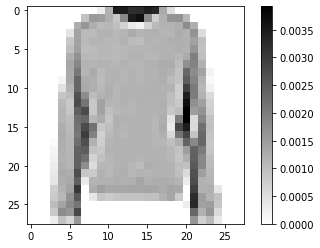

In [40]:
#plotting a single figure
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

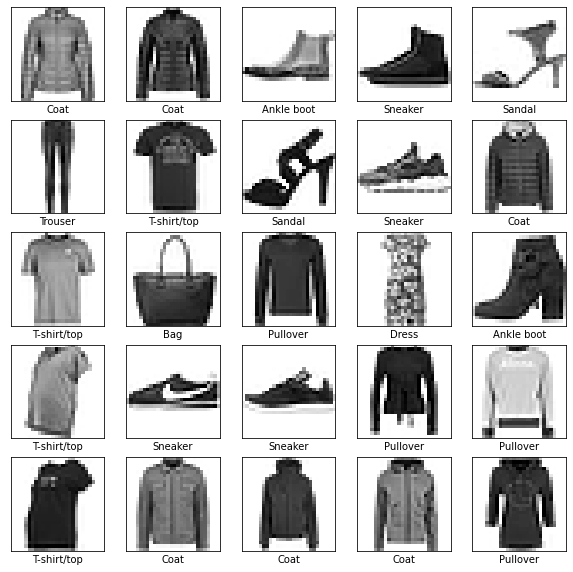

In [49]:
plt.figure(figsize=(10,10))
i=0
for (image , label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image , cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i=i+1
plt.show()  

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128 , activation = tf.nn.relu),
                             tf.keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [0]:
batch_size = 32
train_dataset  = train_dataset.cache().repeat().shuffle(60000).batch(32)

In [0]:
test_dataset = test_dataset.cache().batch(32)


In [57]:
model.fit(train_dataset , epochs = 7 , steps_per_epoch= math.ceil(60000/32))

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4437 - accuracy: 0.8443
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4349 - accuracy: 0.8467
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4228 - accuracy: 0.8510
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8534
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8548
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4092 - accuracy: 0.8557
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4014 - accuracy: 0.8582


In [0]:
for image , label in test_dataset.take(1):   #its better that we call the image or label from this way
  image = image.numpy()
  label = label.numpy()
  prediction = model.predict(image)
  break

In [64]:
prediction.shape

(32, 10)

In [66]:
prediction[0]

array([ -4.156885 ,  -4.4613237,   1.2477564,  -5.848739 ,   4.2355843,
       -16.217285 ,   2.3000236, -20.788841 ,  -2.4473698, -18.46753  ],
      dtype=float32)

In [67]:
np.argmax(prediction[0])

4

In [70]:
label[0]

4

<h1>BINGO!

In [71]:
test_loss , test_accuracy = model.evaluate(test_dataset , steps = 10000/32)

313/312 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8416
